## PyTplot examples with matplotlib

The matplotlib backend is currently only available in the 'matplotlib-backend' branch of the PyTplot repo. To install this branch with pip,use:

pip install --upgrade https://github.com/MAVENSDC/PyTplot/archive/matplotlib-backend.zip

In [1]:
import pyspedas
from pytplot.MPLPlotter.tplot import tplot

Load some data

In [2]:
trange = ['2015-10-16/13:06', '2015-10-16/13:07']

pyspedas.mms.fgm(trange=trange, data_rate='brst', time_clip=True)
pyspedas.mms.edp(trange=trange, data_rate='brst', time_clip=True)
pyspedas.mms.fpi(trange=trange, datatype=['des-moms', 'dis-moms'], data_rate='brst', time_clip=True)


07-Oct-21 12:14:16: Loading pydata\mms1\fgm\brst\l2\2015\10\16\mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Time clip was applied to: mms1_fgm_r_gse_brst_l2
Time clip was applied to: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hirange_brst_l2
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms1_fgm_stemp_brst_l2
Time clip was applied to: mms1_fgm_etemp_brst_l2
Time clip was applied to: mms1_fgm_mode_brst_l2
Time clip error: No pytplot names were provided.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_brst_l2
mms1_fgm_b_gsm_brst_l2
mms

07-Oct-21 12:14:18: Loading pydata\mms1\edp\brst\l2\dce\2015\10\16\mms1_edp_brst_l2_dce_20151016130524_v2.2.0.cdf


Time clip was applied to: mms1_edp_dce_gse_brst_l2
Time clip was applied to: mms1_edp_dce_dsl_brst_l2
Time clip was applied to: mms1_edp_dce_par_epar_brst_l2
Loaded variables:
mms1_edp_dce_gse_brst_l2
mms1_edp_dce_dsl_brst_l2
mms1_edp_dce_par_epar_brst_l2


07-Oct-21 12:14:24: Loading pydata\mms1\fpi\brst\l2\des-moms\2015\10\16\mms1_fpi_brst_l2_des-moms_20151016130524_v3.3.0.cdf
07-Oct-21 12:14:24: Loading pydata\mms1\fpi\brst\l2\dis-moms\2015\10\16\mms1_fpi_brst_l2_dis-moms_20151016130524_v3.3.0.cdf


Time clip was applied to: mms1_des_errorflags_brst
Time clip was applied to: mms1_des_compressionloss_brst
Time clip was applied to: mms1_des_startdelphi_count_brst
Time clip was applied to: mms1_des_startdelphi_angle_brst
Time clip was applied to: mms1_des_sector_despinp_brst
Time clip was applied to: mms1_des_pitchangdist_lowen_brst
Time clip was applied to: mms1_des_pitchangdist_miden_brst
Time clip was applied to: mms1_des_pitchangdist_highen_brst
Time clip was applied to: mms1_des_energyspectr_px_brst
Time clip was applied to: mms1_des_energyspectr_mx_brst
Time clip was applied to: mms1_des_energyspectr_py_brst
Time clip was applied to: mms1_des_energyspectr_my_brst
Time clip was applied to: mms1_des_energyspectr_pz_brst
Time clip was applied to: mms1_des_energyspectr_mz_brst
Time clip was applied to: mms1_des_energyspectr_par_brst
Time clip was applied to: mms1_des_energyspectr_anti_brst
Time clip was applied to: mms1_des_energyspectr_perp_brst
Time clip was applied to: mms1_des_

['mms1_des_errorflags_brst',
 'mms1_des_compressionloss_brst',
 'mms1_des_startdelphi_count_brst',
 'mms1_des_startdelphi_angle_brst',
 'mms1_des_sector_despinp_brst',
 'mms1_des_pitchangdist_lowen_brst',
 'mms1_des_pitchangdist_miden_brst',
 'mms1_des_pitchangdist_highen_brst',
 'mms1_des_energyspectr_px_brst',
 'mms1_des_energyspectr_mx_brst',
 'mms1_des_energyspectr_py_brst',
 'mms1_des_energyspectr_my_brst',
 'mms1_des_energyspectr_pz_brst',
 'mms1_des_energyspectr_mz_brst',
 'mms1_des_energyspectr_par_brst',
 'mms1_des_energyspectr_anti_brst',
 'mms1_des_energyspectr_perp_brst',
 'mms1_des_energyspectr_omni_brst',
 'mms1_des_numberdensity_brst',
 'mms1_des_densityextrapolation_low_brst',
 'mms1_des_densityextrapolation_high_brst',
 'mms1_des_bulkv_dbcs_brst',
 'mms1_des_bulkv_spintone_dbcs_brst',
 'mms1_des_bulkv_gse_brst',
 'mms1_des_bulkv_spintone_gse_brst',
 'mms1_des_prestensor_dbcs_brst',
 'mms1_des_prestensor_gse_brst',
 'mms1_des_temptensor_dbcs_brst',
 'mms1_des_temptensor

Create a simple figure containing:

    1) B-field data (GSE coordinates)
    2) E-field data (GSE coordinates)
    3) DES energy spectra
    4) DES pitch angle distribution (mid-energy)
    5) DES bulk velocity
    6) DES number density

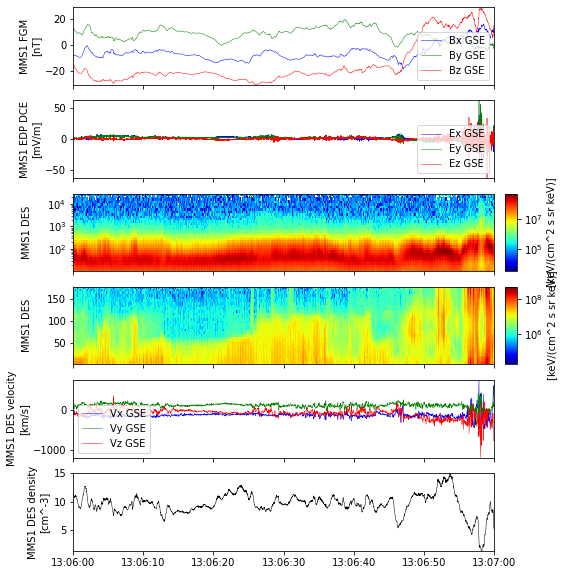

In [4]:
tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

It looks like the DES spectra doesn't have the units in the y-subtitle, so we'll set it

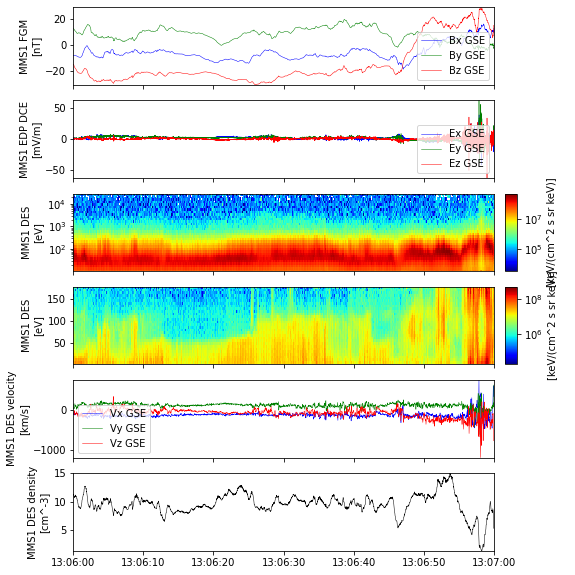

In [5]:
from pytplot import options

options('mms1_des_energyspectr_omni_brst', 'ysubtitle', '[eV]')
options('mms1_des_pitchangdist_miden_brst', 'ysubtitle', '[eV]')

tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

To change the size of the figure, use the 'xsize' and 'ysize' options; these are specified in inches

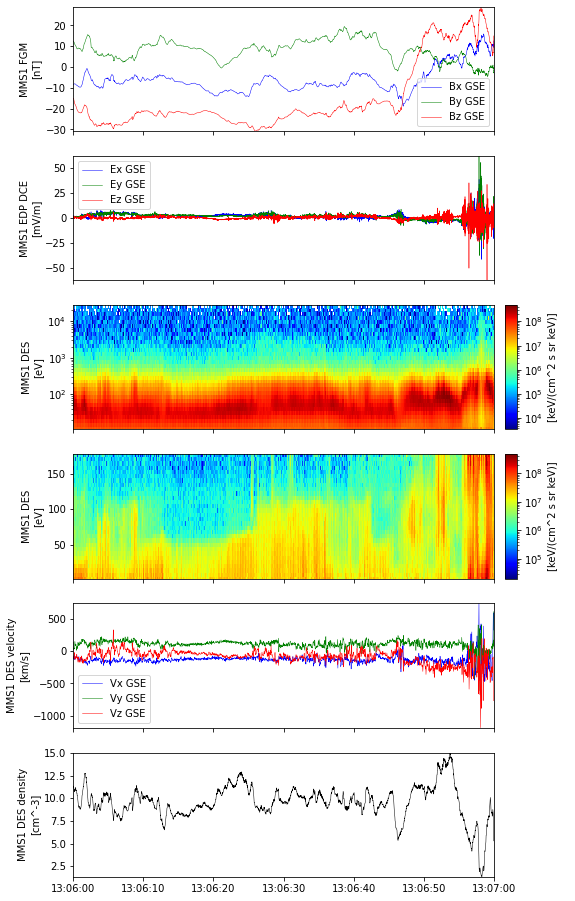

In [6]:
tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'], xsize=8, ysize=16)

To change the range of the y-axis, use the 'yrange' option

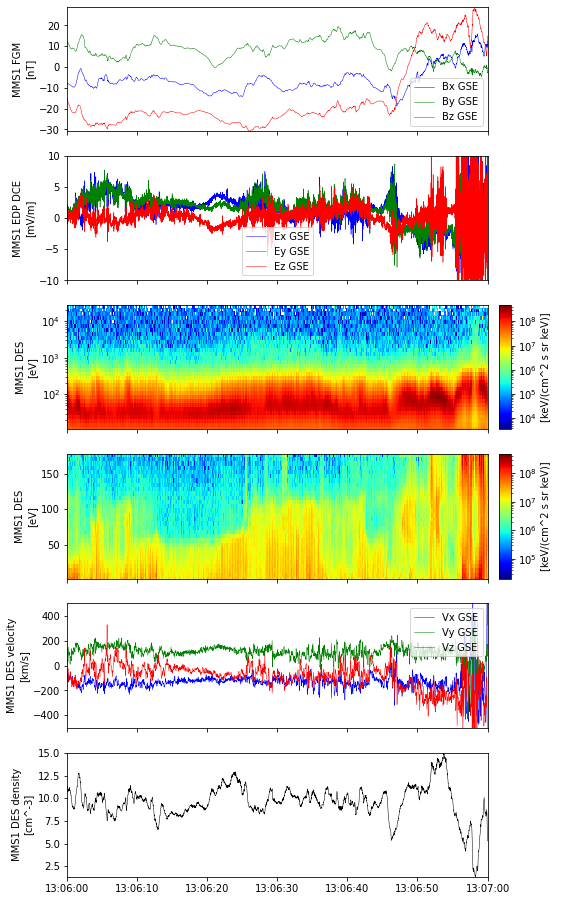

In [8]:
options('mms1_des_bulkv_gse_brst', 'yrange', [-500, 500])
options('mms1_edp_dce_gse_brst_l2', 'yrange', [-10, 10])

tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'], xsize=8, ysize=16)

To set the DES density to a log scale, use the 'ylog' option

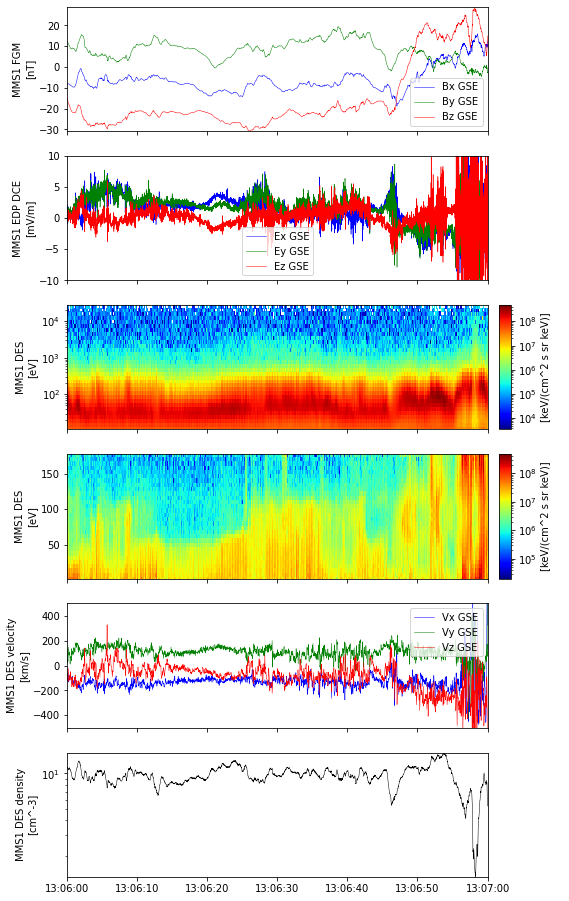

In [9]:
options('mms1_des_numberdensity_brst', 'ylog', True)

tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'], xsize=8, ysize=16)

We're repeating the 'MMS1' in the y-axis title's; we could change the plot title to 'MMS1' and remove it from the y-axis

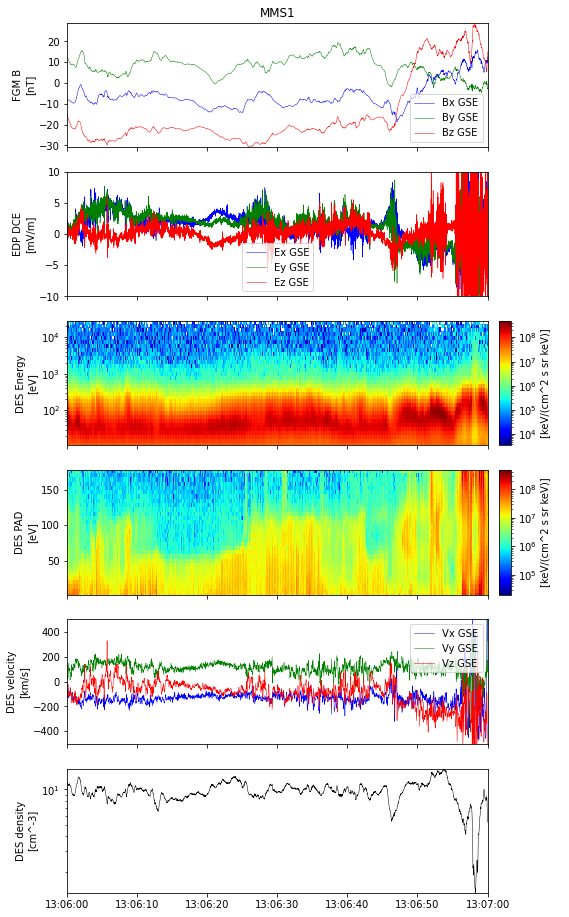

In [10]:
from pytplot import tplot_options

tplot_options('title', 'MMS1')

options('mms1_fgm_b_gse_brst_l2_bvec', 'ytitle', 'FGM B')
options('mms1_edp_dce_gse_brst_l2', 'ytitle', 'EDP DCE')
options('mms1_des_energyspectr_omni_brst', 'ytitle', 'DES Energy')
options('mms1_des_pitchangdist_miden_brst', 'ytitle', 'DES PAD')
options('mms1_des_bulkv_gse_brst', 'ytitle', 'DES velocity')
options('mms1_des_numberdensity_brst', 'ytitle', 'DES density')

tplot(['mms1_fgm_b_gse_brst_l2_bvec',
       'mms1_edp_dce_gse_brst_l2',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_pitchangdist_miden_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'], xsize=8, ysize=16)